In [1]:
cd /home/soda/rcappuzz/work/benchmark-join-suggestions

/home/soda/rcappuzz/work/benchmark-join-suggestions


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%autoreload 2
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import matplotlib.colors as mcolors
import src.utils.plotting as plotting
from src.data_structures.loggers import read_logs

In [4]:
cfg = pl.Config()
cfg.set_fmt_str_lengths(150)

polars.config.Config

# Full base table

In [5]:
# run_name = "0111-s9c28pyn"
run_name = "0109-90whx6jr"
df_raw, df_agg = read_logs(run_name)

df_raw = (
    df_raw.sort("join_strategy")
    .with_columns((pl.col("join_strategy") + "_" + pl.col("aggregation")).alias("case"))
    .sort("case")
)

In [6]:
df_ = (
    df_raw.with_columns(
        (pl.col("join_strategy") + "_" + pl.col("aggregation")).alias("case")
    )
    .sort("case")
    .groupby(
        pl.col(
            [
                "scenario_id",
                "base_table",
                "candidate_table",
                "case",
                "join_strategy",
                "aggregation",
                "iterations",
            ]
        )
    )
    .agg(pl.mean("r2score"))
)

## Pivot

In [7]:
pivoted = plotting.prepare_pivoted_table(df_raw)
pivoted.style.background_gradient(axis=1, cmap="RdYlGn").format(precision=3)

## Plotting

In [8]:
colors1 = plt.cm.Purples(np.linspace(0.25, 0.75, 2))
colors2 = plt.cm.cool(1)
colors3 = plt.cm.YlGn(np.linspace(0.5, 1, 2))
colors4 = plt.cm.Reds(np.linspace(0.5, 1, 3))
colors = np.vstack((colors1, colors2, colors3, colors4))

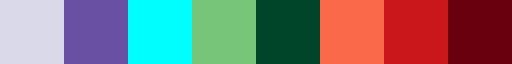

In [9]:
mcolors.ListedColormap(colors)

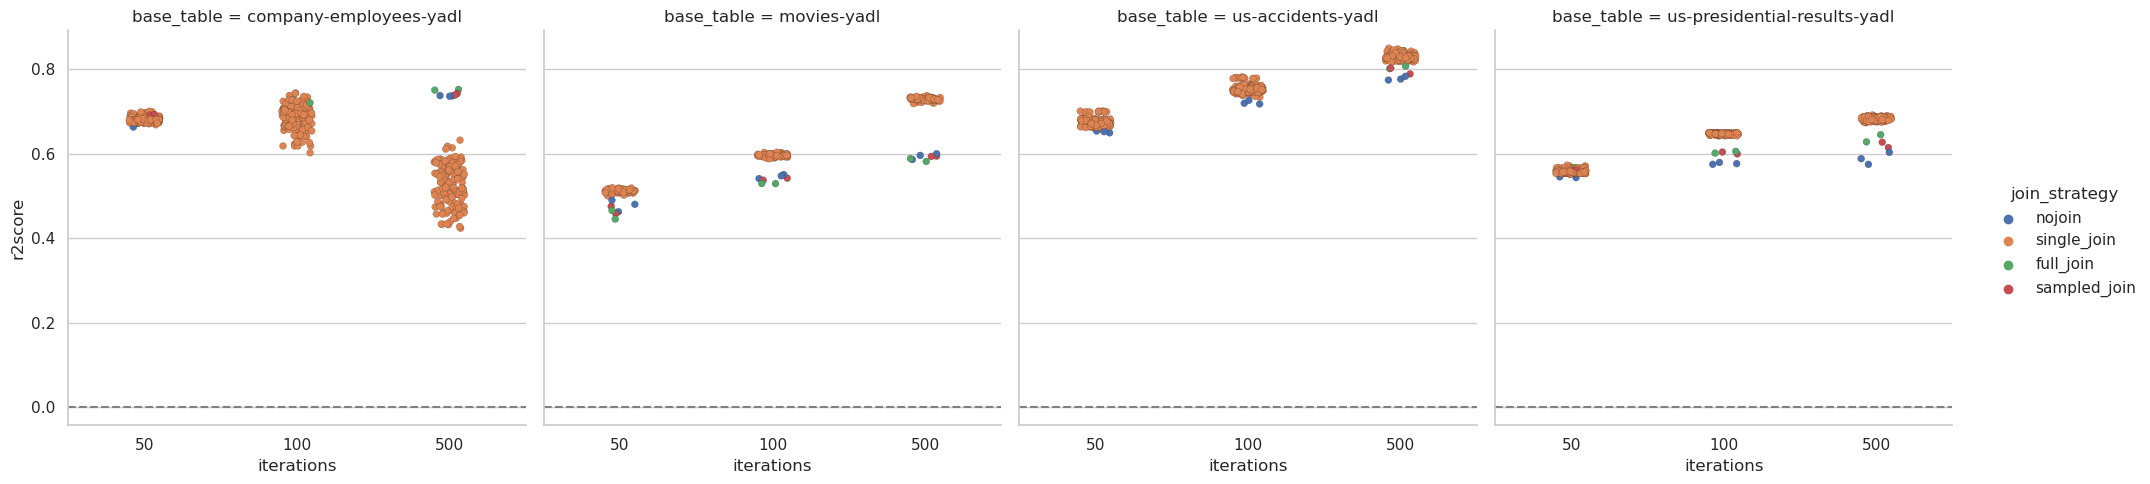

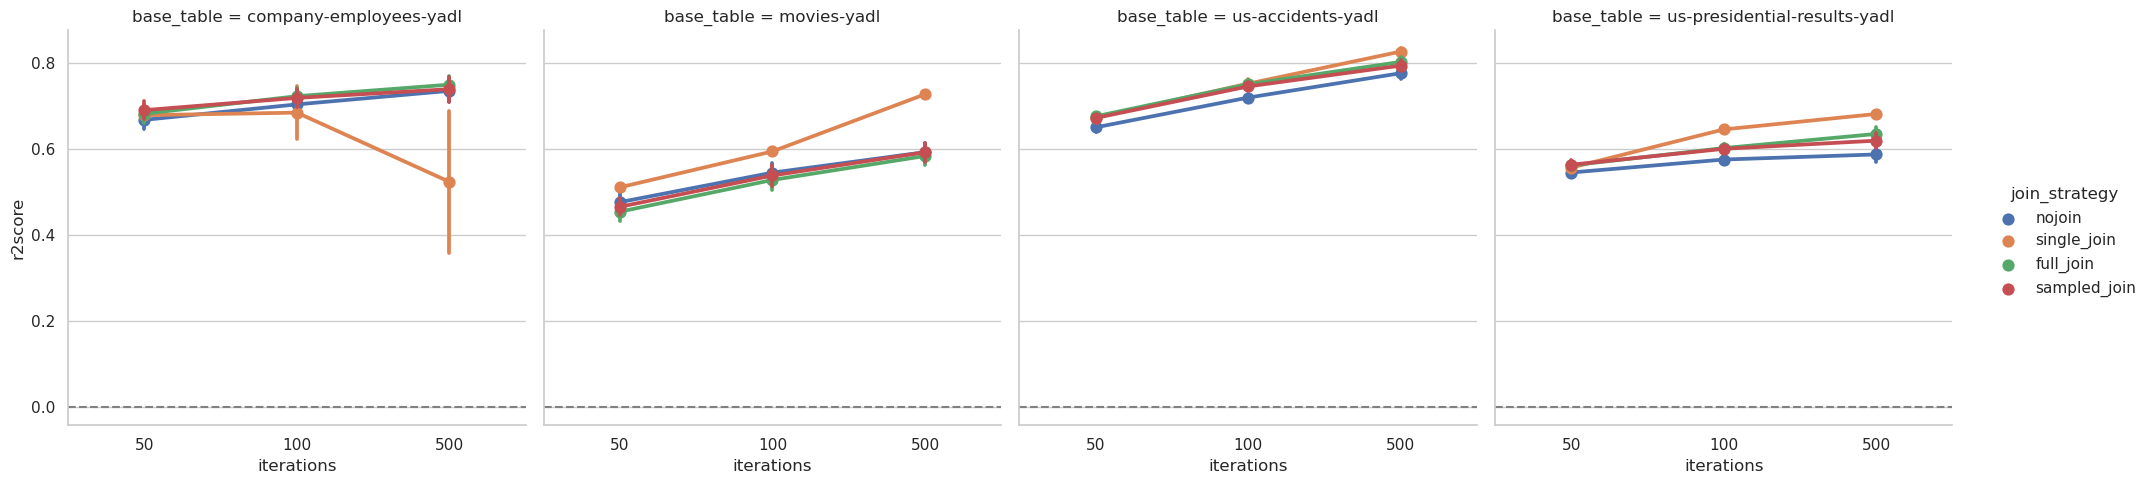

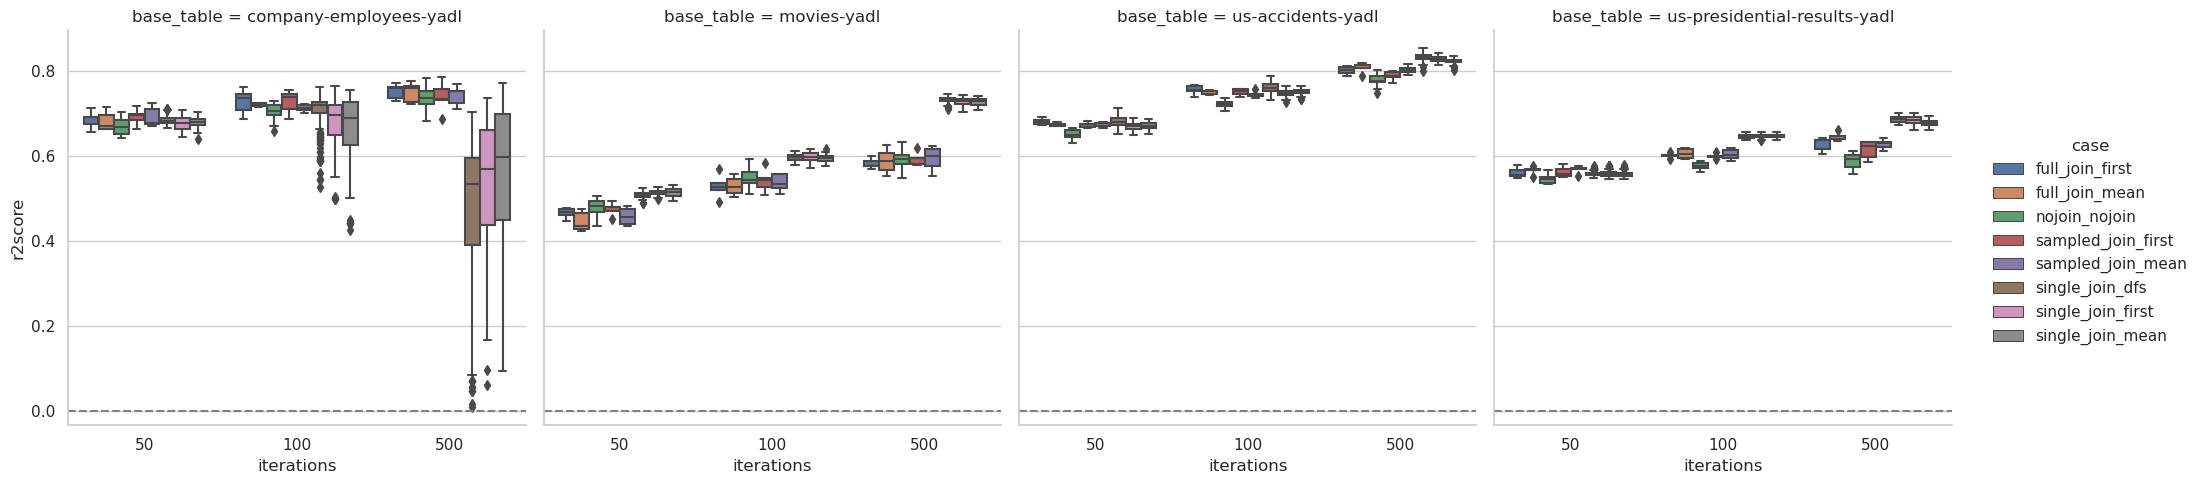

In [10]:
plotting.prepare_plots(df_raw)

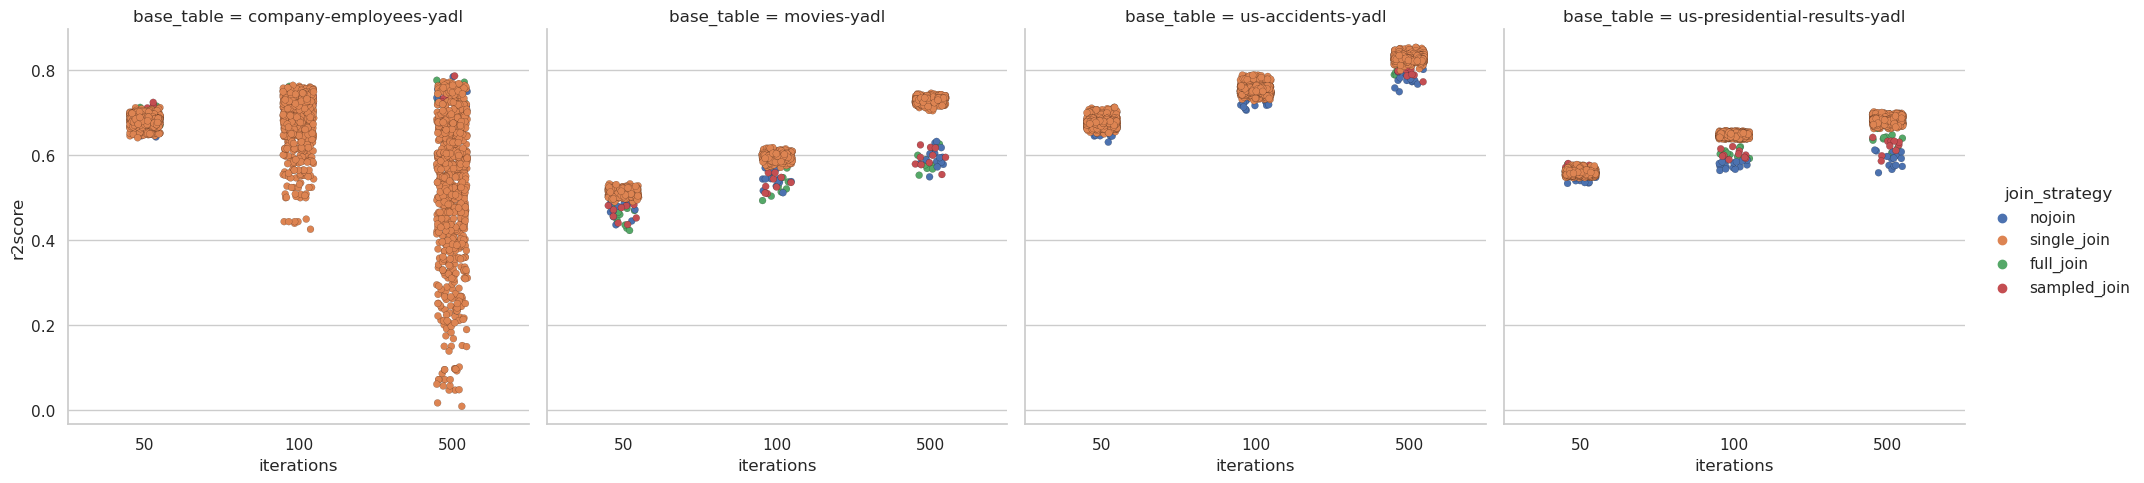

In [11]:
g = sns.catplot(
    data=df_raw.sort("base_table").to_pandas(),
    col="base_table",
    hue="join_strategy",
    y="r2score",
    x="iterations",
    kind="strip",
    hue_order=["nojoin", "single_join", "full_join", "sampled_join"],
    dodge=False,
    edgecolor="black",
    linewidth=0.1
    # palette=colors,
)

# Depleted tables

In [12]:
run_name = "0111-s9c28pyn"
df_raw, df_agg = read_logs(run_name)

df_raw = (
    df_raw.sort("join_strategy")
    .with_columns((pl.col("join_strategy") + "_" + pl.col("aggregation")).alias("case"))
    .sort("case")
)

In [13]:
pivoted = plotting.prepare_pivoted_table(df_raw)
pivoted.style.background_gradient(axis=1, cmap="RdYlGn").format(precision=3)

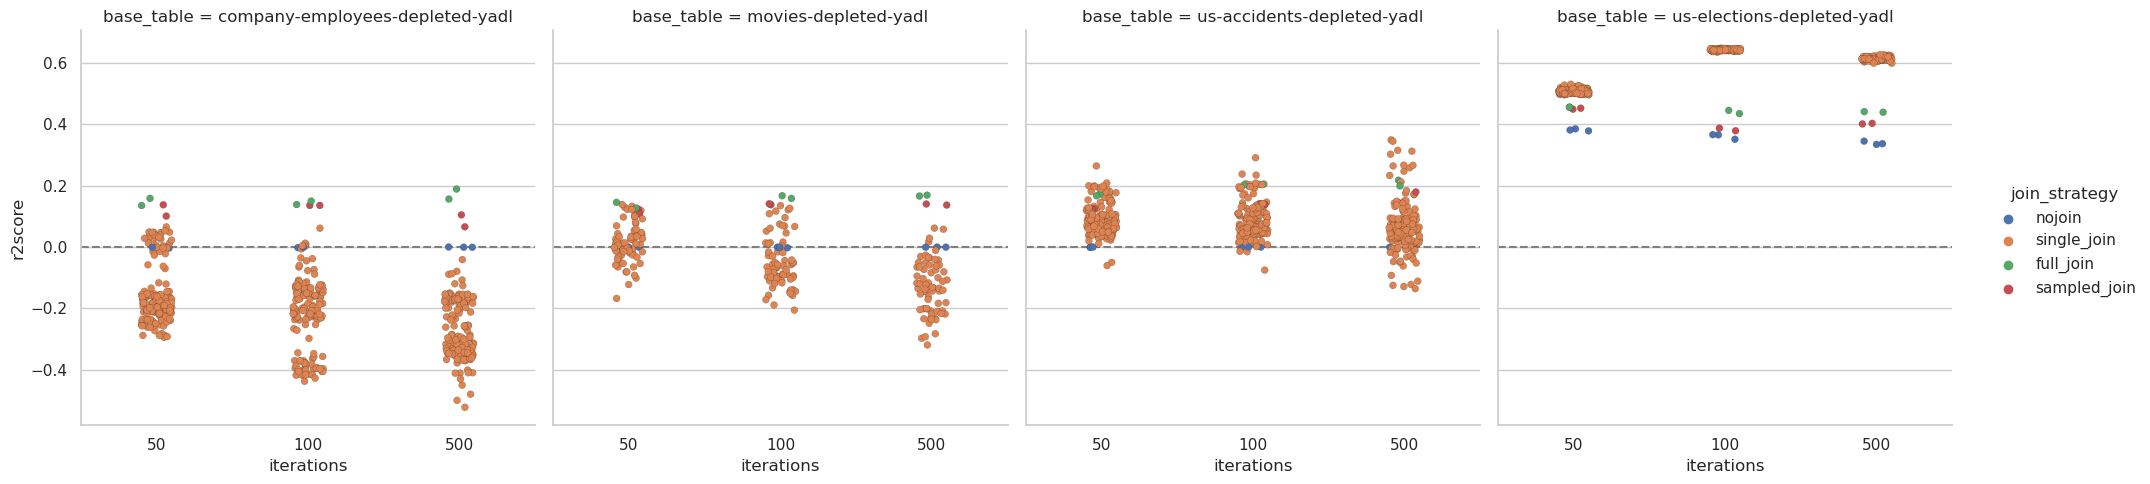

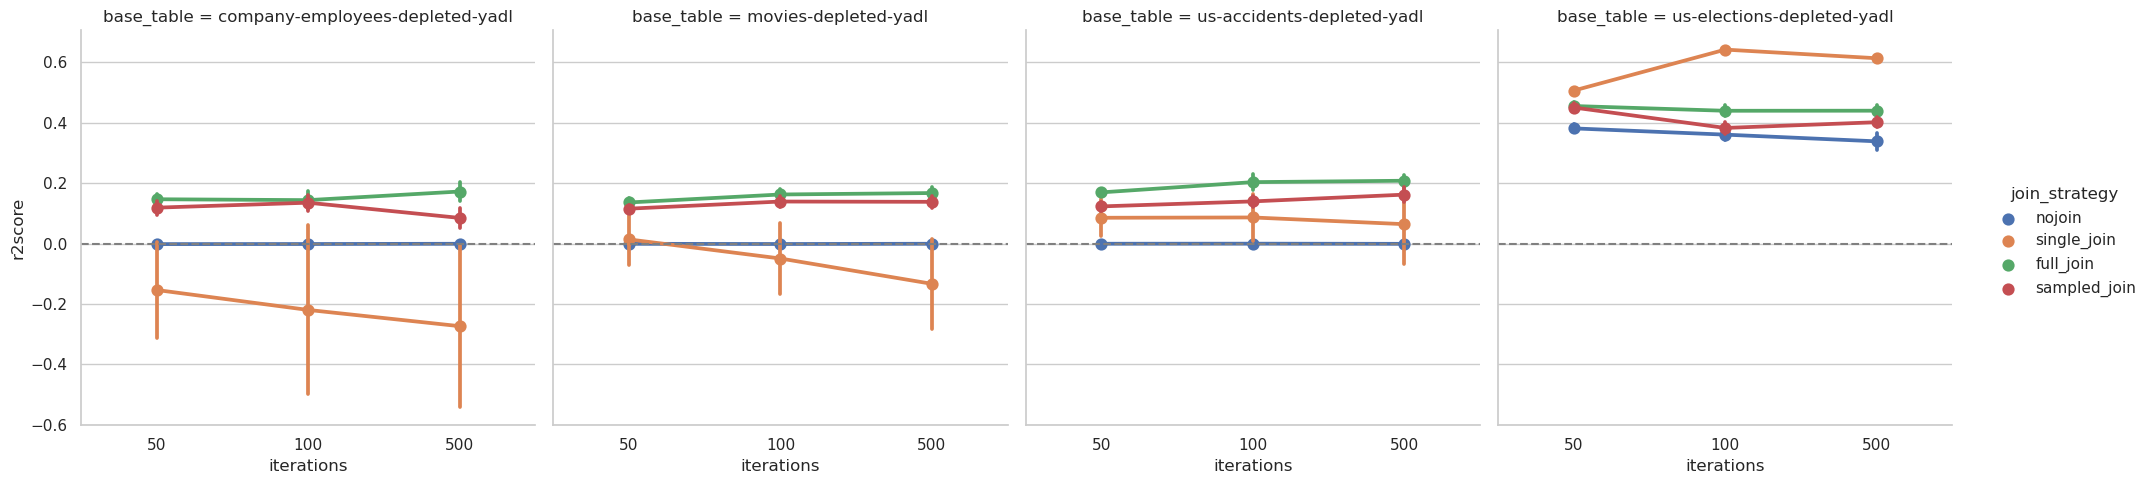

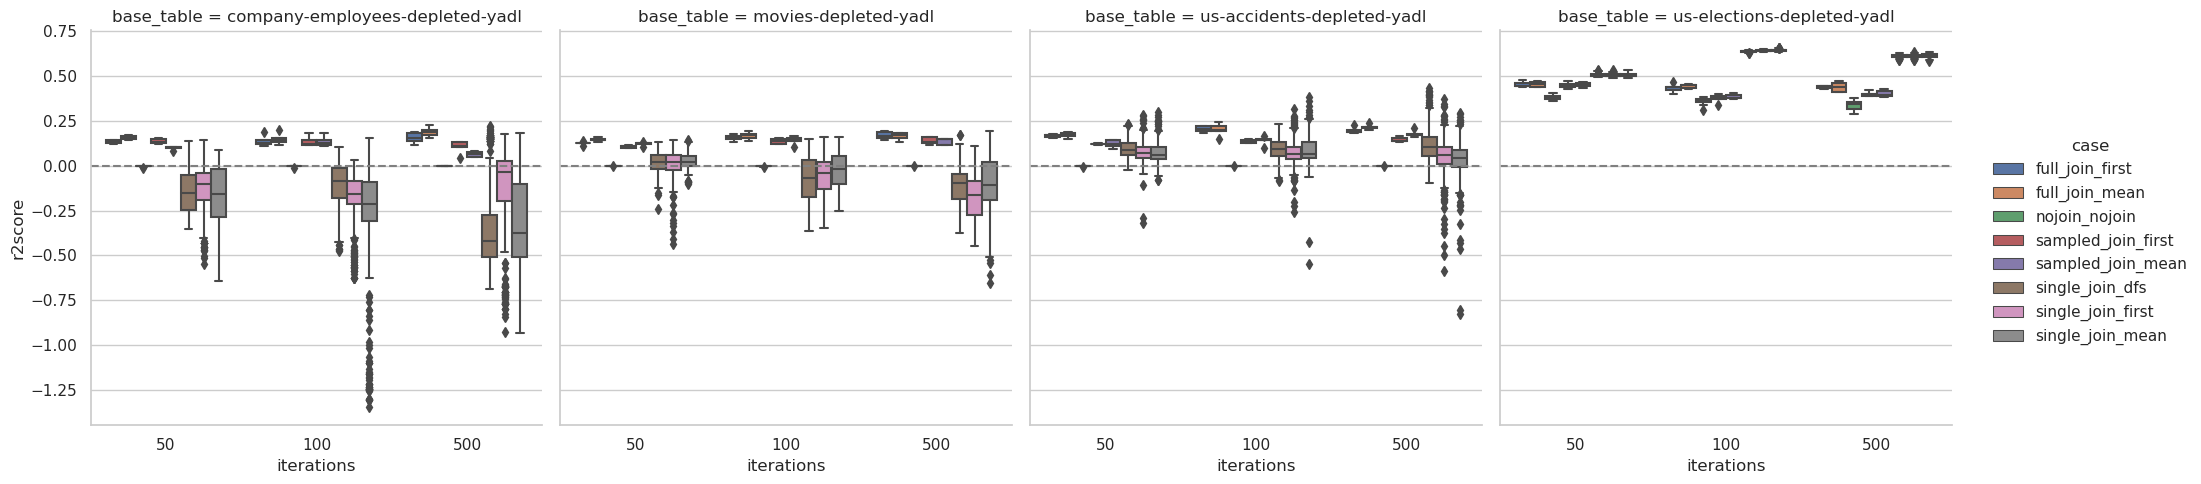

In [14]:
plotting.prepare_plots(df_raw)

In [15]:
df_ = (
    df_raw.with_columns(
        (pl.col("join_strategy") + "_" + pl.col("aggregation")).alias("case")
    )
    .sort("case")
    .groupby(
        pl.col(
            [
                "scenario_id",
                "base_table",
                "candidate_table",
                "case",
                "join_strategy",
                "aggregation",
                "iterations",
            ]
        )
    )
    .agg(pl.mean("r2score"))
)

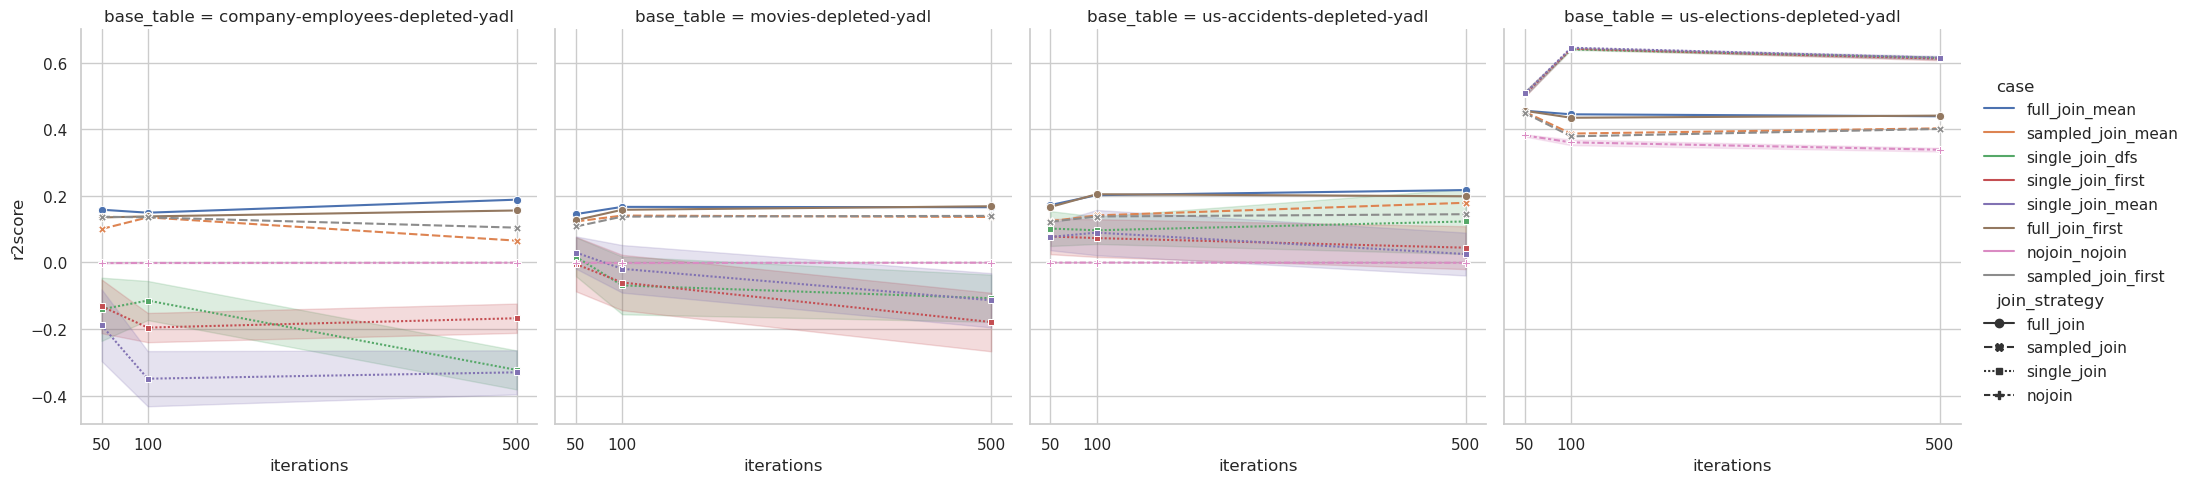

In [16]:
g = sns.relplot(
    data=df_.sort("base_table").to_pandas(),
    col="base_table",
    hue="case",
    y="r2score",
    x="iterations",
    kind="line",
    errorbar="sd",
    style="join_strategy",
    markers=True,
    # palette=colors,
)
for ax in g.axes.flat:
    ax.set_xticks([50, 100, 500])

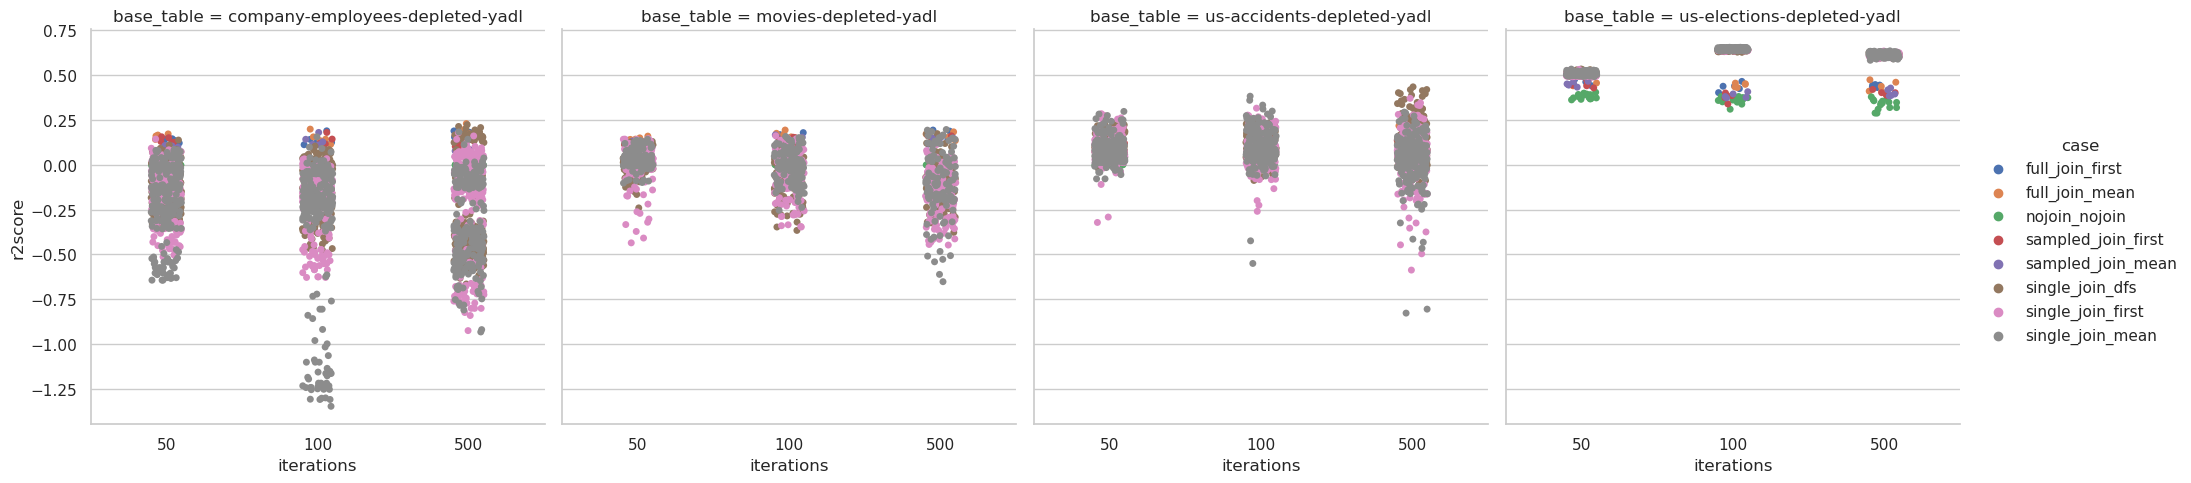

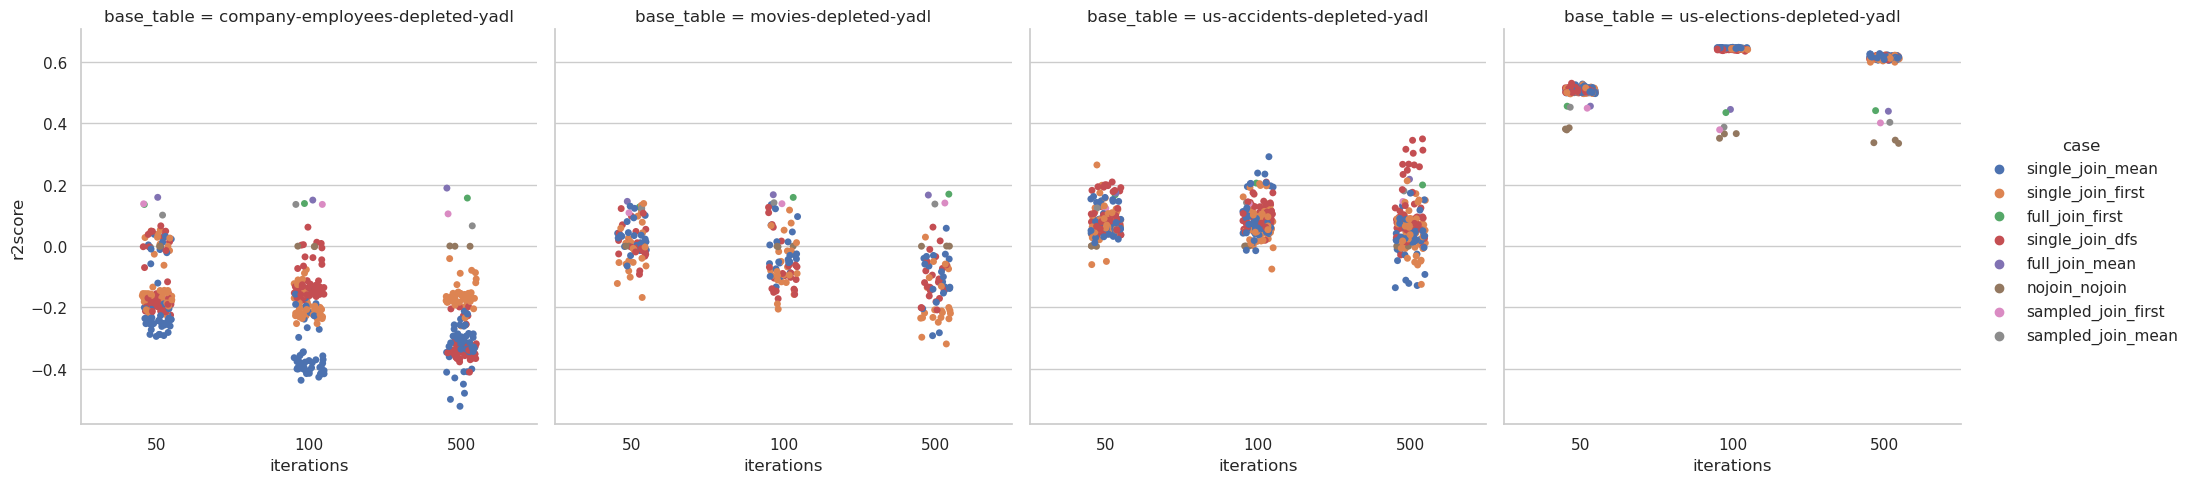

In [17]:
g = sns.catplot(
    data=df_raw.sort("base_table").to_pandas(),
    col="base_table",
    hue="case",
    y="r2score",
    x="iterations",
    kind="strip",
    # palette=colors,
)
g = sns.catplot(
    data=df_.sort("base_table").to_pandas(),
    col="base_table",
    hue="case",
    y="r2score",
    x="iterations",
    kind="strip",
    # palette=colors,
)

In [18]:
import matplotlib as mpl

In [19]:
c = mpl.colormaps["Purples"].resampled(4)
# mpl.colors.ListedColormap(colors)

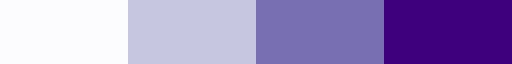

In [20]:
c

In [21]:
colormaps = ["Greens", "Oranges", "Purples", "Blues"]
c_list = []
groups = df_.unique(["join_strategy", "aggregation"]).select("join_strategy", "aggregation").sort("join_strategy").groupby("join_strategy")
for idx, (g, group) in enumerate(groups):
    cmap = colormaps[idx]
    resampled = mpl.colormaps[cmap].resampled(len(group))
    c_list.append(resampled(range(len(group))))

In [22]:
c_list

[array([[0.96862745, 0.98823529, 0.96078431, 1.        ],
        [0.        , 0.26666667, 0.10588235, 1.        ]]),
 array([[1.        , 0.96078431, 0.92156863, 1.        ],
        [0.49803922, 0.15294118, 0.01568627, 1.        ]]),
 array([[0.24705882, 0.        , 0.49019608, 1.        ]]),
 array([[0.96862745, 0.98431373, 1.        , 1.        ],
        [0.41960784, 0.68235294, 0.83921569, 1.        ],
        [0.03137255, 0.18823529, 0.41960784, 1.        ]])]

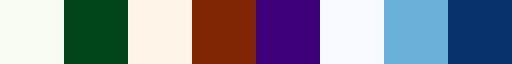

In [23]:
mpl.colors.ListedColormap(np.vstack(c_list))

In [24]:
resampled(range(3))

array([[0.96862745, 0.98431373, 1.        , 1.        ],
       [0.41960784, 0.68235294, 0.83921569, 1.        ],
       [0.03137255, 0.18823529, 0.41960784, 1.        ]])

# Another example

In [25]:

run_name = "0131-e1uwu0gq"
df_raw, df_agg = read_logs(run_name)

df_raw = (
    df_raw.sort("join_strategy")
    .with_columns((pl.col("join_strategy") + "_" + pl.col("aggregation")).alias("case"))
    .sort("case")
)

In [26]:
df_ = (
    df_raw.with_columns(
        (pl.col("join_strategy") + "_" + pl.col("aggregation")).alias("case")
    )
    .sort("case")
    .groupby(
        pl.col(
            [
                "scenario_id",
                "base_table",
                "candidate_table",
                "case",
                "join_strategy",
                "aggregation",
                "iterations",
            ]
        )
    )
    .agg(pl.mean("r2score"))
)

In [27]:
pivoted = plotting.prepare_pivoted_table(df_raw)
pivoted.style.background_gradient(axis=1, cmap="RdYlGn").format(precision=3)

,join_strategy,nojoin,single_join
,aggregation,nojoin,first
base_table,iterations,,
company-employees-depleted-yadl,1000,-0.002,-0.025
movies-depleted-yadl,1000,-0.002,-0.015
us-accidents-depleted-yadl,1000,-0.001,0.060
us-elections-depleted-yadl,1000,0.347,0.594


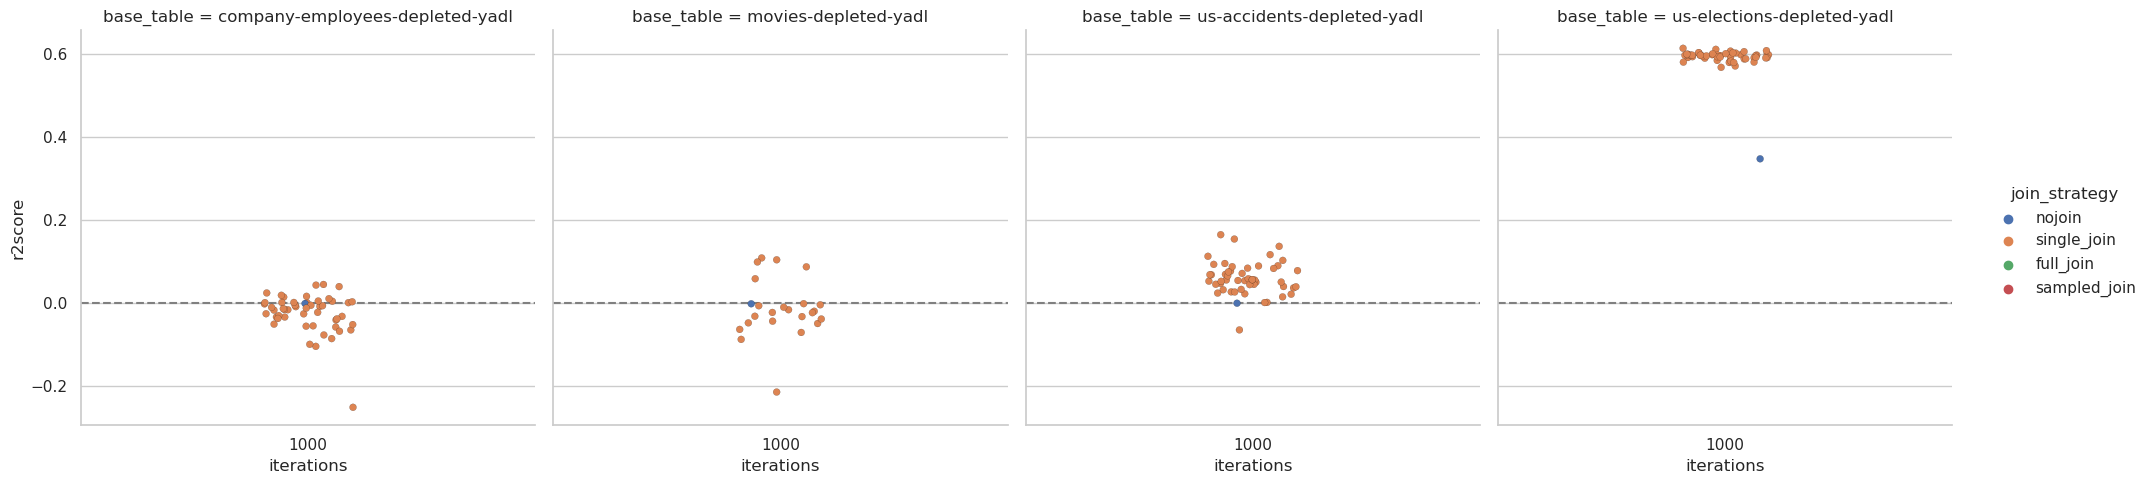

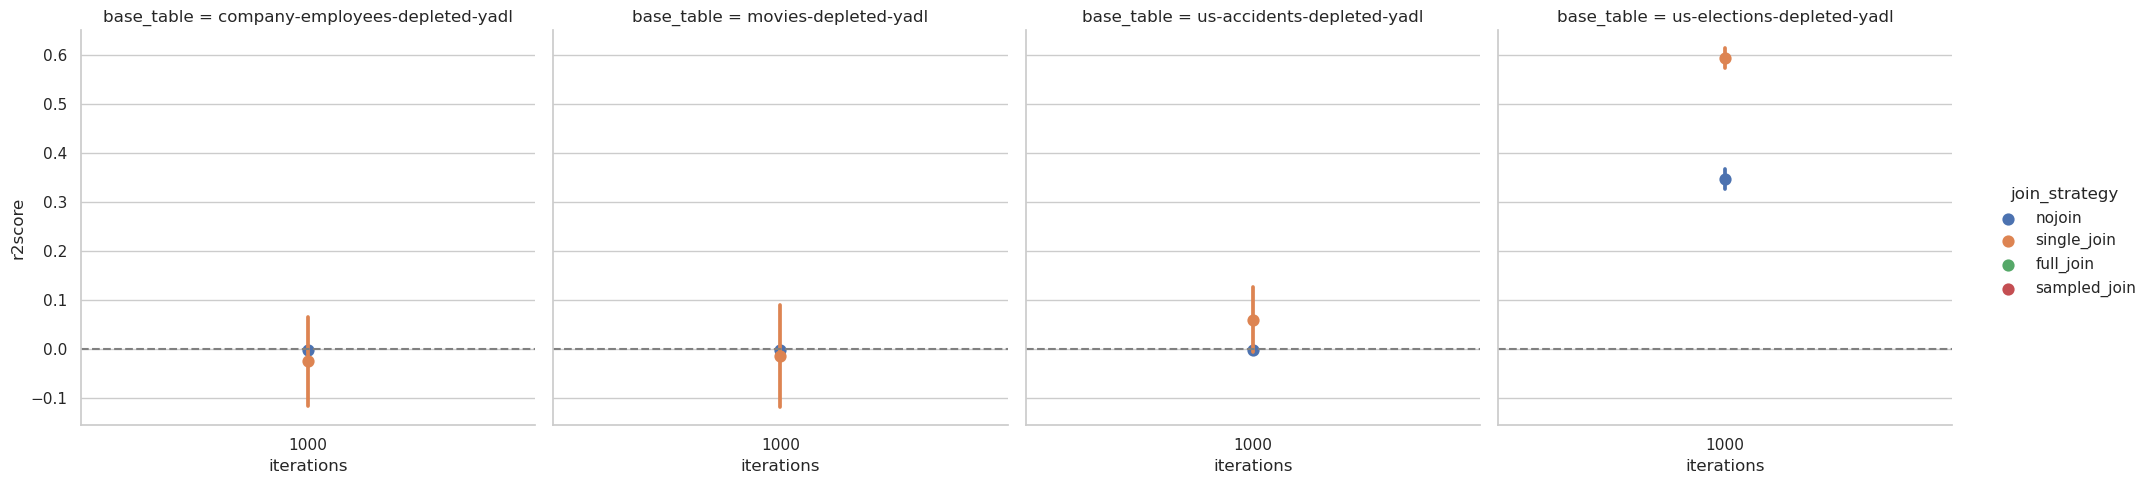

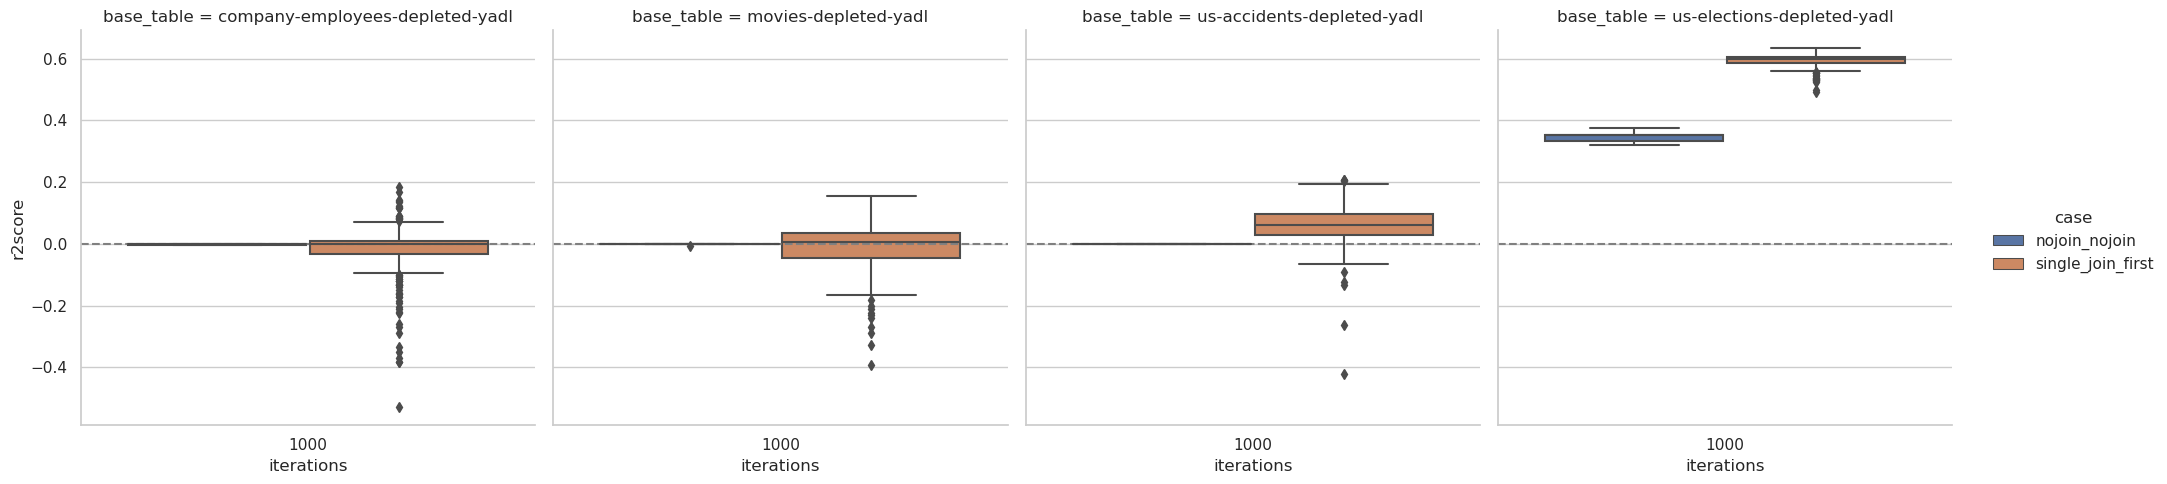

In [28]:
plotting.prepare_plots(df_raw)

In [31]:
df_raw.head()

scenario_id,run_id,status,target_dl,git_hash,index_name,base_table,candidate_table,iterations,join_strategy,aggregation,fold_id,time_train,time_eval,time_join,time_eval_join,best_candidate_hash,n_cols,r2score,avg_r2,std_r2,tree_count,best_iteration,case
i64,i64,str,str,str,str,str,str,i64,str,str,i64,f64,f64,f64,f64,str,i64,f64,str,str,i64,i64,str
0,2,"""SUCCESS""","""wordnet_big""","""733f1a2a0dad0468b484aca9ebbe50819231ec69""","""base_table""","""company-employees-depleted-yadl""",null,1000,"""nojoin""","""nojoin""",0,0.177618,0.004617,null,null,null,2,-0.000368,null,null,64,63,"""nojoin_nojoin"""
0,3,"""SUCCESS""","""wordnet_big""","""733f1a2a0dad0468b484aca9ebbe50819231ec69""","""base_table""","""company-employees-depleted-yadl""",null,1000,"""nojoin""","""nojoin""",1,0.056862,0.004614,null,null,null,2,-0.004832,null,null,15,14,"""nojoin_nojoin"""
0,4,"""SUCCESS""","""wordnet_big""","""733f1a2a0dad0468b484aca9ebbe50819231ec69""","""base_table""","""company-employees-depleted-yadl""",null,1000,"""nojoin""","""nojoin""",2,0.113978,0.005484,null,null,null,2,-0.000155,null,null,82,81,"""nojoin_nojoin"""
0,5,"""SUCCESS""","""wordnet_big""","""733f1a2a0dad0468b484aca9ebbe50819231ec69""","""base_table""","""company-employees-depleted-yadl""",null,1000,"""nojoin""","""nojoin""",3,0.059598,0.00454,null,null,null,2,-0.002422,null,null,17,16,"""nojoin_nojoin"""
0,6,"""SUCCESS""","""wordnet_big""","""733f1a2a0dad0468b484aca9ebbe50819231ec69""","""base_table""","""company-employees-depleted-yadl""",null,1000,"""nojoin""","""nojoin""",4,0.047084,0.005159,null,null,null,2,-0.000085,null,null,1,0,"""nojoin_nojoin"""


<Axes: xlabel='tree_count', ylabel='r2score'>

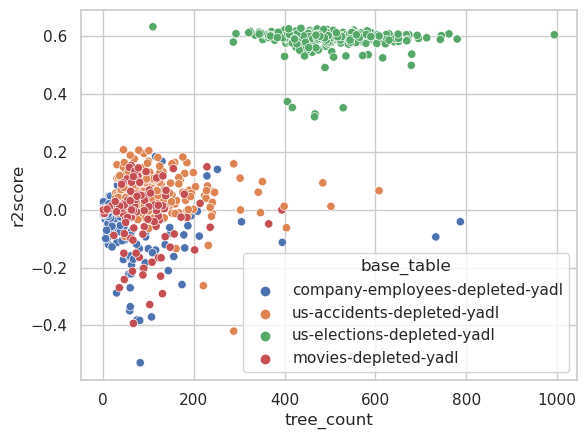

In [33]:
sns.scatterplot(data=df_raw.to_pandas(), x="tree_count", y="r2score", hue="base_table")

In [45]:
_df = df_raw.groupby("tree_count").agg(
    pl.count().alias("count")
).join(df_raw, right_on="tree_count", left_on="tree_count")

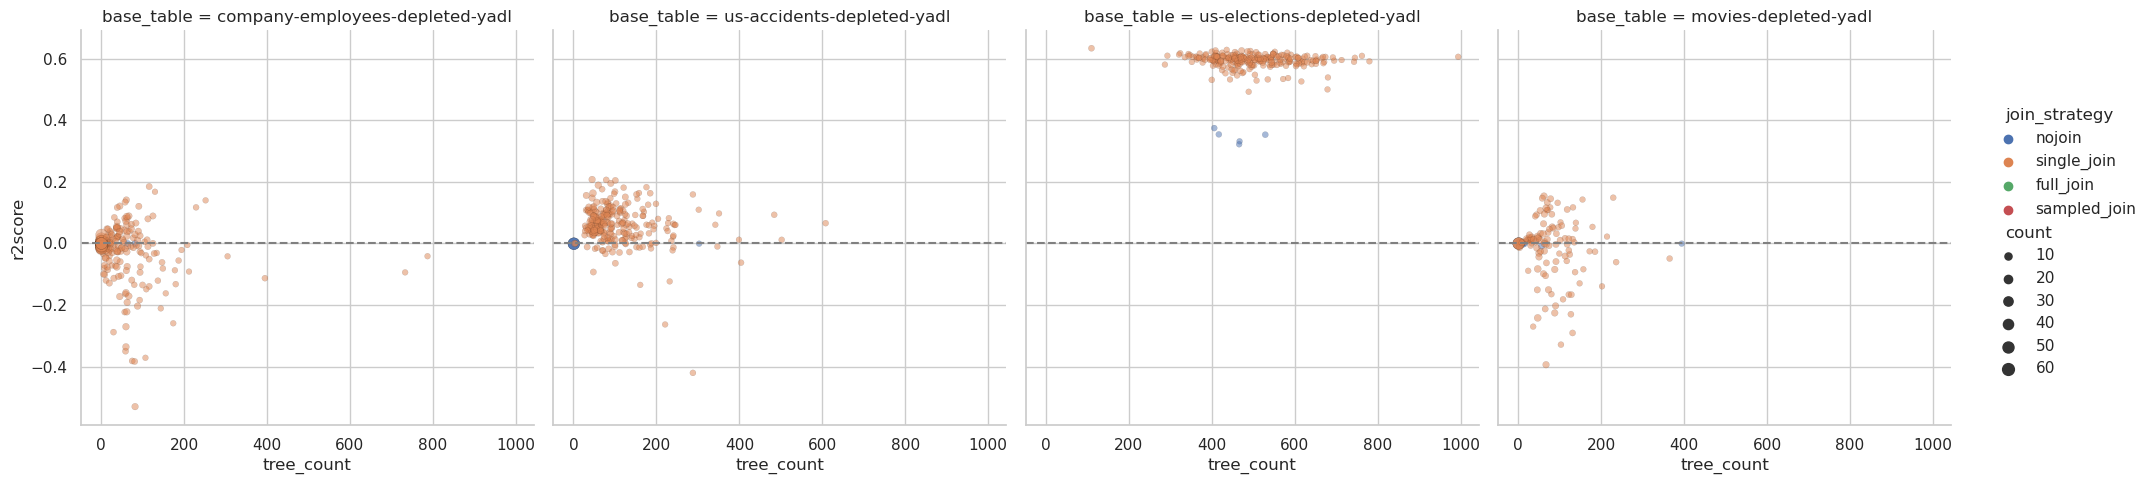

In [49]:
g = sns.relplot(
    data=_df.to_pandas(),
    col="base_table",
    hue="join_strategy",
    y="r2score",
    x="tree_count",
    size="count",
    kind="scatter",
    edgecolor="black",
    linewidth=0.1,
    hue_order=["nojoin", "single_join", "full_join", "sampled_join"],
    alpha=0.5
    # palette=colors,
)
g.refline(y=0)



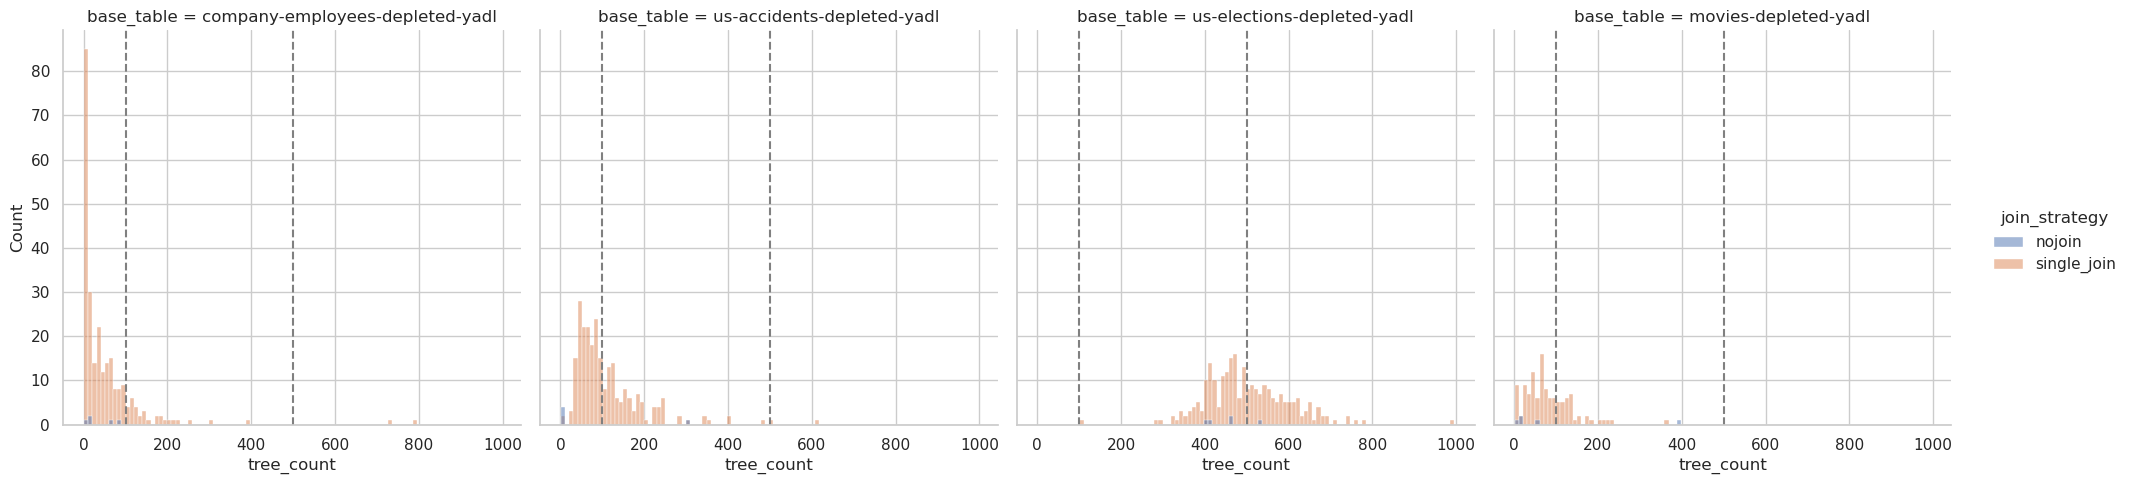

In [62]:
df_ = (
    df_raw.with_columns(
        (pl.col("join_strategy") + "_" + pl.col("aggregation")).alias("case")
    )
    .sort("case")
    .groupby(
        pl.col(
            [
                "scenario_id",
                "base_table",
                "candidate_table",
                "case",
                "join_strategy",
                "aggregation",
                "iterations",
            ]
        )
    )
    .agg(pl.mean("r2score"), pl.median("tree_count"))
)

g = sns.displot(data=df_raw.to_pandas(), x="tree_count", bins=100, hue="join_strategy", col="base_table", kind="hist")
g.refline(x=100)
g.refline(x=500)